In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

visa_df=pd.read_csv(r'C:\Users\rajat\OneDrive\Desktop\DS GenAI\Data Files\Visadataset.csv')

cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

In [8]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [76]:
# I want how many people certified from asia 
# I want how many people denied certified from asia 

#        certified    denied
#Asia 
#Eu
#Na
con1 = visa_df['continent']=='Asia'
con2 = visa_df['case_status']=='Certified'
con = con1 & con2
visa_df[con]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.19,Year,Y,Certified
10,EZYV11,Asia,Master's,N,N,2465,2004,Midwest,83588.56,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified


In [130]:
labels=visa_df['continent'].unique()
certi_count,deni_count=[],[]
for i in labels:
    con1 = visa_df['continent']==i
    con2 = visa_df['case_status']=='Certified'
    con3 = visa_df['case_status']=='Denied'
    
    con_certified = con1 & con2
    con_denied = con1 & con3

    certi_count.append(len(visa_df[con_certified]))
    deni_count.append(len(visa_df[con_denied]))

data=zip(certi_count,deni_count)
analysis_df=pd.DataFrame(data,index=[labels],columns=['Certified','Denied'])
analysis_df

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


<Axes: >

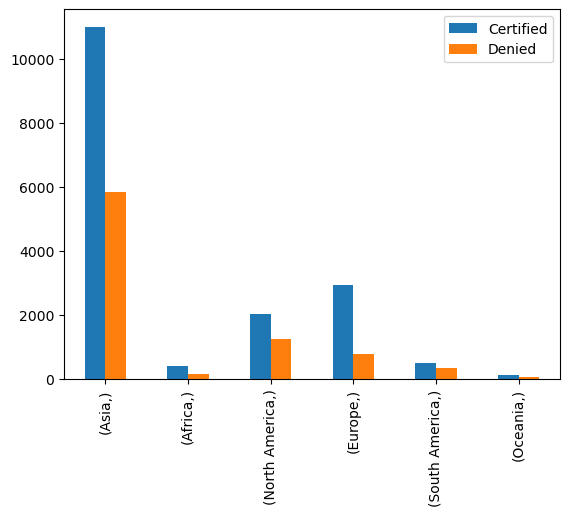

In [144]:
analysis_df.plot(kind='bar')

In [150]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

**Instead of numbers always show the insights using percentage**

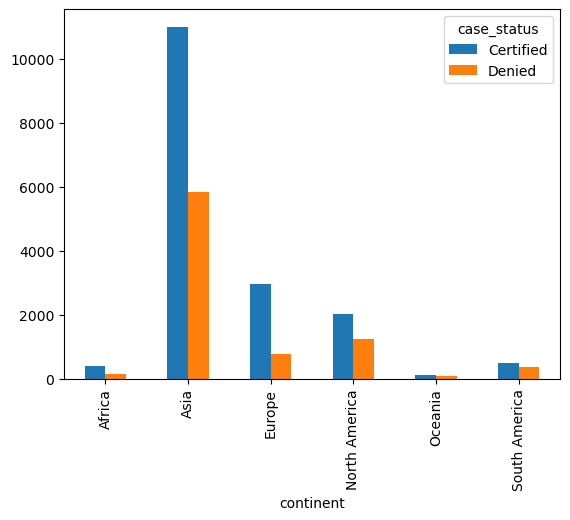

In [159]:
col1=visa_df['continent']
col2=visa_df['case_status']
analysis_df1=pd.crosstab(col1,col2)
analysis_df1.plot(kind='bar')
plt.show()

In [183]:
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
cols=[col2,col3]
a1=pd.crosstab(col1,cols)
a1

case_status            Certified            ...      Denied         
education_of_employee Bachelor's Doctorate  ... High School Master's
continent                                   ...                     
Africa                        81        43  ...          43       38
Asia                        4407       780  ...        1614     1331
Europe                      1040       788  ...         328      130
North America                641       207  ...         191      429
Oceania                       38        19  ...          17       22
South America                160        75  ...          63      109

[6 rows x 8 columns]

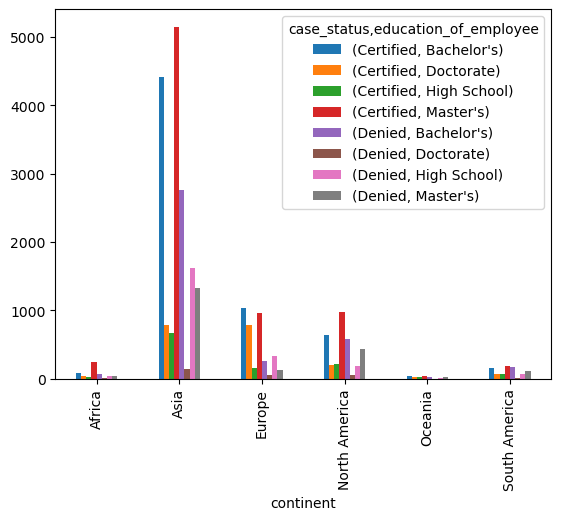

In [185]:
a1.plot(kind='bar')
plt.show()

**Scatter Plots**

- Scatter plots will give the relationships graph between two numerical columns

- How one variable is varying according to another variable

- If we want to get a value we need to do **correlation**

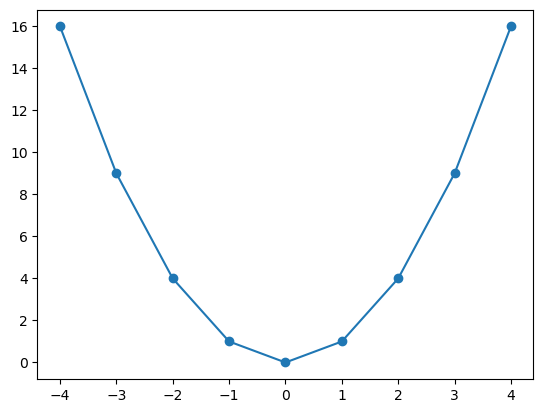

In [216]:
x=range(-4,5)
y=[i**2 for i in x]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [218]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

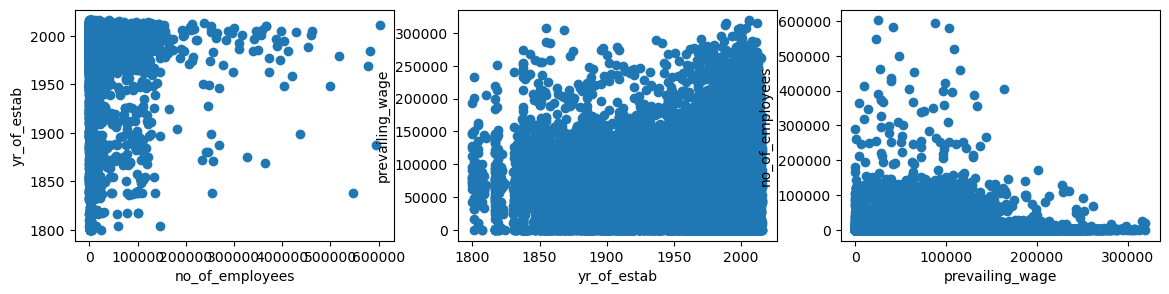

In [248]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']

plt.figure(figsize=(14,3))
plt.subplot(1,3,1).scatter(col1,col2)
plt.xlabel('no_of_employees')
plt.ylabel('yr_of_estab')
plt.subplot(1,3,2).scatter(col2,col3)
plt.xlabel('yr_of_estab')
plt.ylabel('prevailing_wage')
plt.subplot(1,3,3).scatter(col3,col1)
plt.xlabel('prevailing_wage')
plt.ylabel('no_of_employees')
plt.show()

**Corelation**

In [254]:
visa_df.corr(numeric_only=True)
# -1 to 1 is the range

**Heat map**

- Heap maps are good to understand data

<Axes: >

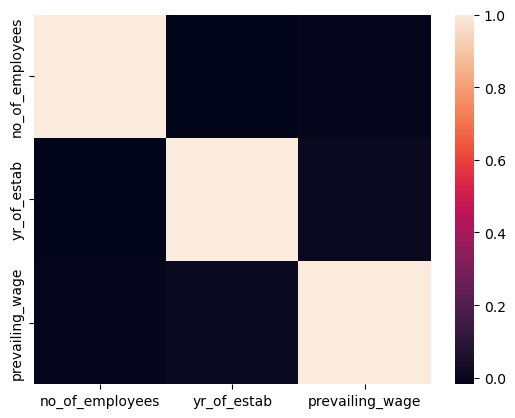

In [258]:
sns.heatmap(visa_df.corr(numeric_only=True))

<Axes: >

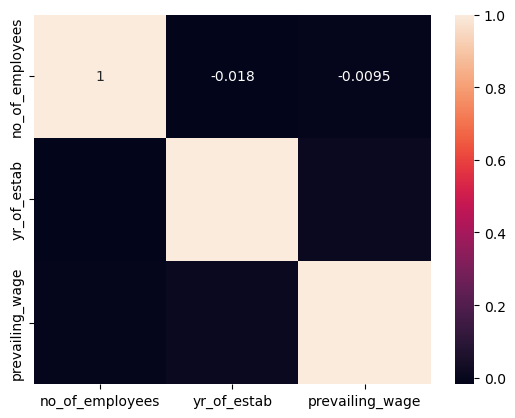

In [261]:
corr_visa=visa_df.corr(numeric_only=True)
sns.heatmap(corr_visa,
           annot=True)